<a href="https://colab.research.google.com/github/yashmanuraj2/udacity-DS/blob/master/DSproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

cd = pd.read_csv('/content/drive/My Drive/boston/calendar.csv')
li = pd.read_csv('/content/drive/My Drive/boston/listings.csv')
rev = pd.read_csv('/content/drive/My Drive/boston/reviews.csv')

li.head()





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

exploring the data

No of rows and columns in the dataset

In [4]:
#rows and columns in calendar
rows_calendar=len(cd.axes[0])
col_calendar=len(cd.axes[1])
print("Number of Rows: "+str(rows_calendar))
print("Number of Columns: "+str(col_calendar))

Number of Rows: 1308890
Number of Columns: 4


In [5]:
#@rows and columns in listings
rows_listing = len(li.axes[0])
col_listings=len(li.axes[1])
print("Number of Rows: "+str(rows_listing))
print("Number of Columns: "+str(col_listings))


Number of Rows: 3585
Number of Columns: 95


In [6]:
#rows and columns in reviews
rows_rev = len(rev.axes[0])
col_rev=len(rev.axes[1])
print("Number of Rows: "+str(rows_rev))
print("Number of Columns: "+str(col_rev))

Number of Rows: 68275
Number of Columns: 6


**ANALYSIS WILL BE DONE ON LISTINGS DATA ONLY CALENDAR AND REVIEWS WILL NOT BE CONSIDERED**

# New Section

In [7]:
#columns with no null values
no_nulls1 = set(cd.columns[cd.isnull().mean()==0])
no_nulls2= set(li.columns[li.isnull().mean()==0])
no_nulls3 = set(rev.columns[rev.isnull().mean()==0])
print(no_nulls1)
print(no_nulls2)
print(no_nulls3)

{'date', 'listing_id', 'available'}
{'picture_url', 'cancellation_policy', 'smart_location', 'accommodates', 'calendar_last_scraped', 'host_name', 'name', 'longitude', 'host_has_profile_pic', 'latitude', 'host_total_listings_count', 'number_of_reviews', 'host_identity_verified', 'minimum_nights', 'country_code', 'instant_bookable', 'is_location_exact', 'last_scraped', 'calendar_updated', 'street', 'availability_365', 'availability_60', 'host_verifications', 'guests_included', 'availability_90', 'id', 'require_guest_profile_picture', 'host_thumbnail_url', 'host_listings_count', 'price', 'bed_type', 'maximum_nights', 'country', 'host_id', 'host_since', 'state', 'require_guest_phone_verification', 'calculated_host_listings_count', 'description', 'host_is_superhost', 'host_picture_url', 'availability_30', 'listing_url', 'amenities', 'extra_people', 'experiences_offered', 'host_url', 'neighbourhood_cleansed', 'requires_license', 'room_type', 'scrape_id'}
{'reviewer_name', 'id', 'date', 'rev

removing cols with 75% missing values

columns with 75% of their values missing

In [8]:
most_missing_cols_cal = set(cd.columns[cd.isnull().mean() > 0.75])
most_missing_cols_lis = set(li.columns[li.isnull().mean()>0.75])
most_missing_cols_rev= set(rev.columns[rev.isnull().mean() > 0.75])


print(most_missing_cols_lis)


{'jurisdiction_names', 'neighbourhood_group_cleansed', 'has_availability', 'weekly_price', 'square_feet', 'monthly_price', 'license'}


*italicized text*# New Section

filtering the data

removing duplicate cities

In [9]:
li.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'dorchester, boston ',
       'South Boston', 'Allston', 'ALLSTON'], dtype=object)

removing duplicate cities

In [0]:
li['city_cleansed'] = li.city.copy()

In [0]:

li['city_cleansed'] = li.city_cleansed.replace('ALLSTON', 'Allston')
li['city_cleansed'] = li.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
li['city_cleansed'] = li.city_cleansed.replace('dorchester, boston ', 'Dorchester')
li['city_cleansed'] = li.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
li['city_cleansed'] = li.city_cleansed.replace('east Boston ', 'East Boston')
li['city_cleansed'] = li.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
li['city_cleansed'] = li.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
li['city_cleansed'] = li.city_cleansed.replace('Brighton ', 'Brighton')
li['city_cleansed'] = li.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [12]:
li.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       '波士顿', 'Boston, Massachusetts, US', 'South End, Boston',
       'Cambridge', 'East Boston', 'Charlestown', 'Somerville',
       'Watertown', 'Brighton', nan, 'West Roxbury', 'Newton',
       'Hyde Park', 'Mattapan', 'Milton', 'Dorchester', 'South Boston',
       'Allston'], dtype=object)

In [0]:
li['price'] = li['price'].replace({'\$': '', ',': ''}, regex=True)
li['price'] =li['price'].astype(float)

In [0]:
features_df = li.copy()


removing dollar sign from price in li and features

NameError: ignored

In [15]:
accomodates_count = features_df.accommodates.value_counts()
print(accomodates_count)

2     1483
4      650
1      439
3      428
5      245
6      203
8       55
7       39
10      19
9       10
12       5
11       4
14       3
16       2
Name: accommodates, dtype: int64


In [0]:
li.groupby(['accommodates','price']).price.mean()

accommodates  price
1             20.0      20.0
              22.0      22.0
              25.0      25.0
              27.0      27.0
              28.0      28.0
                       ...  
14            299.0    299.0
              395.0    395.0
              536.0    536.0
16            125.0    125.0
              200.0    200.0
Name: price, Length: 880, dtype: float64

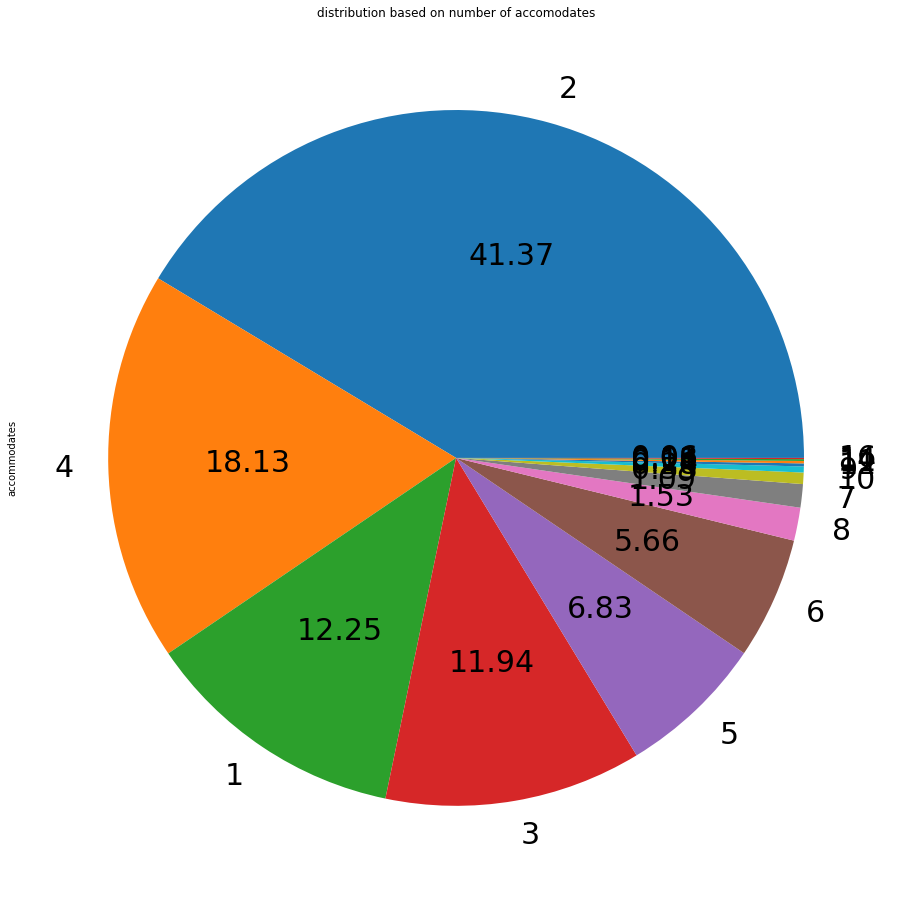

In [16]:
accomodates_count.plot.pie(figsize=(16, 16), fontsize = 30, autopct = '%.2f', title = 'distribution based on number of accomodates');


In [0]:
room_type_count = features_df.room_type.value_counts()
print(room_type_count)

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64


In [17]:
prices_data = li.groupby(['property_type','room_type']).price.mean()
prices_data

property_type    room_type      
Apartment        Entire home/apt    222.479025
                 Private room        98.726463
                 Shared room         84.596774
Bed & Breakfast  Entire home/apt    142.500000
                 Private room       130.921053
                 Shared room         44.000000
Boat             Entire home/apt    265.200000
                 Private room       287.000000
Camper/RV        Entire home/apt     60.000000
Condominium      Entire home/apt    234.640000
                 Private room       109.000000
                 Shared room         70.000000
Dorm             Private room        62.500000
Entire Floor     Entire home/apt    154.000000
                 Private room        90.000000
Guesthouse       Entire home/apt    289.000000
House            Entire home/apt    276.337838
                 Private room        80.246914
                 Shared room         62.333333
Loft             Entire home/apt    217.068966
                 Private ro

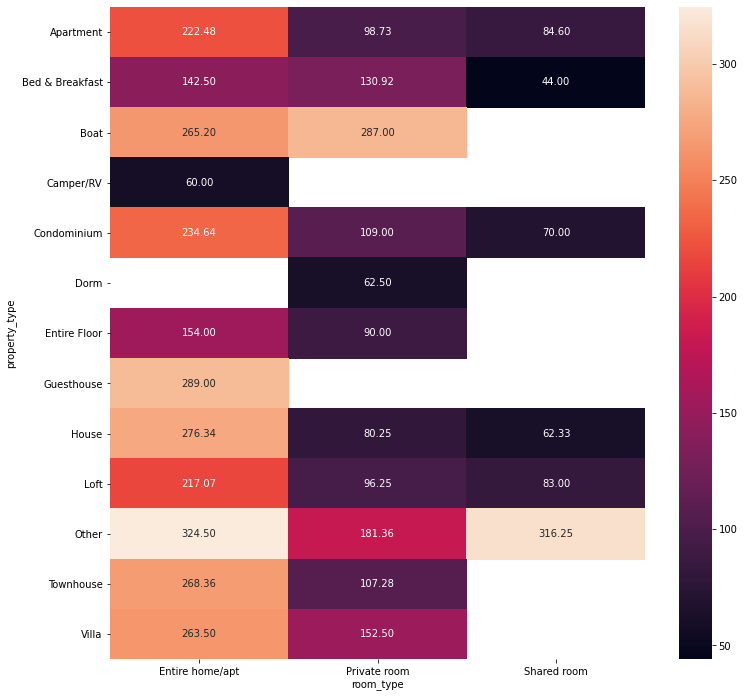

In [18]:
plt.figure(figsize=(12,12));
sns.heatmap(li.groupby(['property_type','room_type']).price.mean().unstack(),annot=True, fmt=".2f");

simple bed and breakfast shared room being the cheapest
where as 
entire home/apt and (other category) being the costliest

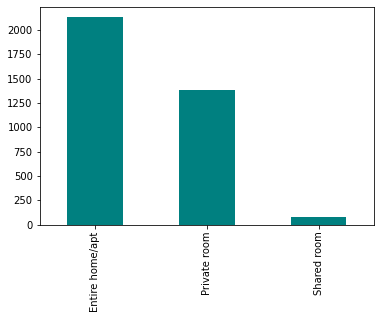

In [0]:
room_type_count.plot(kind='bar', color='teal');

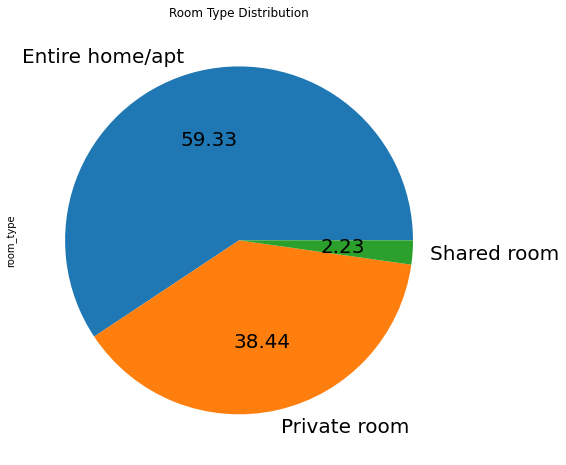

In [0]:
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');


NEXT : Average price per city

In [20]:
prices_city = features_df.groupby(['city_cleansed']).price.mean()
prices_city

city_cleansed
Allston                       86.357143
Boston                       176.718593
Boston, Massachusetts, US     50.000000
Brighton                     107.250000
Brookline                    135.888889
Cambridge                    199.375000
Charlestown                  258.625000
Dorchester                    74.000000
East Boston                  121.000000
Hyde Park                     77.500000
Jamaica Plain                157.200000
Jamaica Plain, MA            120.000000
Mattapan                      85.000000
Milton                        50.000000
Mission Hill, Boston          85.000000
Newton                        90.000000
Roslindale                    99.714286
Roxbury Crossing              94.392857
Somerville                    91.947368
South Boston                 132.000000
South End, Boston            450.000000
Watertown                     60.000000
West Roxbury                  85.600000
波士顿                          100.000000
Name: price, dtype: float6

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text

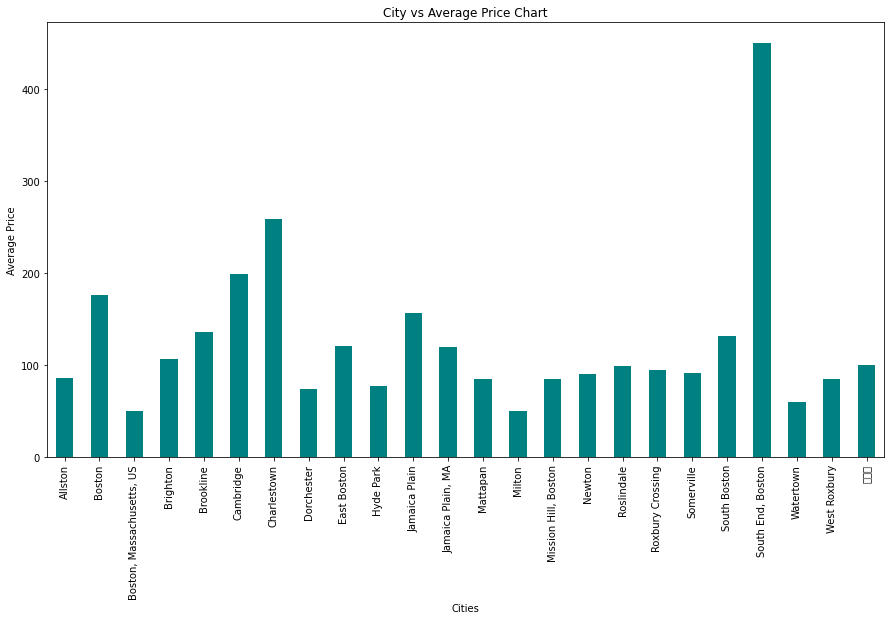

In [22]:

plt.figure(figsize=(15,8));
prices_city.plot(kind='bar', color='teal');
plt.xlabel('Cities')
plt.ylabel('Average Price')
plt.title('City vs Average Price Chart');

In [23]:
property_type_count = features_df.property_type.value_counts()
print(property_type_count)

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64


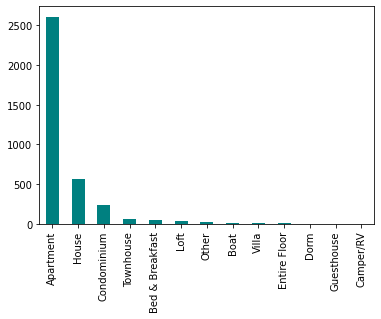

In [0]:
property_type_count.plot(kind='bar', color='teal');

south end boston is the costliest 
where as boston is the cheapest

property type count

COMPARING THE TYPE OF HOUSE AND ROOM WITH PRICES

In [0]:
prices_data = features_df.groupby(['property_type','room_type']).price.mean()
print(prices_data)

property_type    room_type      
Apartment        Entire home/apt    222.479025
                 Private room        98.726463
                 Shared room         84.596774
Bed & Breakfast  Entire home/apt    142.500000
                 Private room       130.921053
                 Shared room         44.000000
Boat             Entire home/apt    265.200000
                 Private room       287.000000
Camper/RV        Entire home/apt     60.000000
Condominium      Entire home/apt    234.640000
                 Private room       109.000000
                 Shared room         70.000000
Dorm             Private room        62.500000
Entire Floor     Entire home/apt    154.000000
                 Private room        90.000000
Guesthouse       Entire home/apt    289.000000
House            Entire home/apt    276.337838
                 Private room        80.246914
                 Shared room         62.333333
Loft             Entire home/apt    217.068966
                 Private ro

In [0]:
price_per_property_type = features_df.groupby('property_type').price.mean()

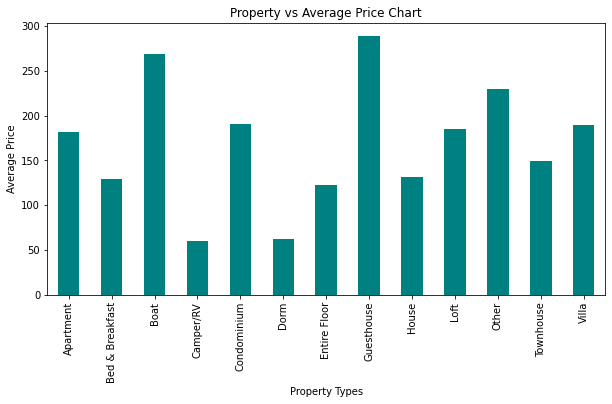

In [0]:
#@title Default title text
plt.figure(figsize=(10,5));
price_per_property_type.plot(kind='bar', color='teal');
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart');

guesthouses are the costliest whereas rv and camper are the cheapest

In [0]:
sup_price = features_df.groupby(['host_is_superhost']).price.mean()
pd.options.display.max_rows = 4000
sup_price

host_is_superhost
f    173.604468
t    176.434889
Name: price, dtype: float64

superhosts are costlier than non-superhosts

In [0]:
superhost_bath = features_df.groupby(['host_is_superhost','bedrooms']).price.mean()
superhost_bed =  features_df.groupby(['host_is_superhost','bedrooms']).price.mean()

In [0]:
print(superhost_bed)


host_is_superhost  bedrooms
f                  0.0         154.557196
                   1.0         137.819358
                   2.0         256.589744
                   3.0         309.647482
                   4.0         371.542857
                   5.0         323.500000
t                  0.0         156.562500
                   1.0         125.325342
                   2.0         278.318841
                   3.0         375.250000
                   4.0         451.900000
                   5.0         745.500000
Name: price, dtype: float64


In [0]:
print(superhost_bath)

In [0]:
superhost_review = features_df.groupby(['host_is_superhost']).review_scores_rating.mean()
superhost_review



host_is_superhost
f    91.061817
t    97.076142
Name: review_scores_rating, dtype: float64

superhosts tend to have a higher rating as compared to normal rooms

In [0]:
superhost_avai =  features_df.groupby(['host_is_superhost']).availability_365.mean()
superhost_avai



host_is_superhost
f    176.670862
t    200.238329
Name: availability_365, dtype: float64

superhosts tend to have a higher availabilty than normal rooms

In [30]:
features_df['price'].isnull().sum()

0

In [31]:
num_cols = li.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,features_df[col].isnull().sum())

id 0
scrape_id 0
host_id 0
host_listings_count 0
host_total_listings_count 0
neighbourhood_group_cleansed 3585
latitude 0
longitude 0
accommodates 0
bathrooms 14
bedrooms 10
beds 9
square_feet 3529
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
has_availability 3585
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 813
review_scores_accuracy 823
review_scores_cleanliness 818
review_scores_checkin 820
review_scores_communication 818
review_scores_location 822
review_scores_value 821
license 3585
jurisdiction_names 3585
calculated_host_listings_count 0
reviews_per_month 756


In [0]:

features_df['bathrooms'] = features_df['bathrooms'].fillna(0)

# Set 1 for bedrooms where bedrooms is Nan
features_df['bedrooms'] = features_df['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
features_df['beds'] = features_df['beds'].fillna(1)
features_df['review_scores_rating']= features_df['review_scores_rating'].fillna(0)
features_df['availability_365']=features_df['availability_365'].fillna(0)
features_df['host_listings_count'] = features_df['host_listings_count'].fillna(1)
features_df['host_total_listings_count'] = features_df['host_total_listings_count'].fillna(1)

In [0]:
def set_bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false type field into a boolean with 1 and 0s
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = ['host_is_superhost']
for t in tf_fields:
    features_df[t] =features_df[t].apply(set_bool_tf)

In [0]:
x = features_df[['bedrooms','beds','bathrooms','review_scores_rating','availability_365','host_is_superhost']]
y = features_df[['price']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=42) 
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print(lm_model.fit(X_train, y_train))
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
The rsquared score on the training data was 0.20133065234955094.  The rsquared score on the test data was 0.14659832644310022.


In [39]:
import matplotlib.pyplot as plt

x1 = features_df['price'].corr(features_df['beds'])
x2 = features_df['price'].corr(features_df['bedrooms'])
x3 = features_df['price'].corr(features_df['bathrooms'])
x4 = features_df['price'].corr(features_df['review_scores_rating'])
x5 = features_df['price'].corr(features_df['availability_365'])
x6 = features_df['price'].corr(features_df['host_is_superhost'])

print(x1, x2, x3, x4, x5, x6)


0.370671487356986 0.3848947636455698 0.24869528412164849 -0.07304267389137525 0.03669410552826106 0.006054297755764709


the correlation of price is strongest with  bedrooms 